# Dimensionaluty Reduction: PCS vs t-SNE

## 1. PCA

The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, while retaining the variation present in the dataset, up to the maximum extent. 

It is done by transforming the variables to a new set of variables, which are known as the principal components (or simply, the PCs) which are are the eigenvectors of a covariance matrix, and hence they are orthogonal, ordered such that the retention of variation present in the original variables decreases as we move down in the order. So, in this way, the 1st principal component retains maximum variation that was present in the original components.

Main important points to be considered:
1. Normalize the data
2. Calculate the covariance matrix
3. Calculate the eigen values and eigen vectors
4. Choosing components and forming a feature vector
5. Forming Principal Components

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
# Standarize the data
df = StandardScaler().fit_transform(df)
df=pd.DataFrame(df,columns=wine.feature_names)

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [11]:
pca = PCA(n_components=2)
pca_results = pca.fit(df)

In [14]:
df_pca = pca_results.transform(df)

In [18]:
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

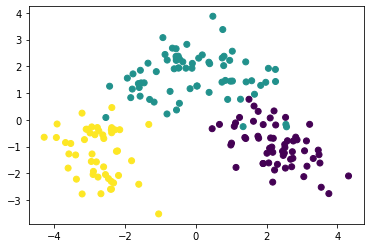

In [21]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=wine.target)
plt.show()

## 2. t-SNE

- t-SNE, unlike PCA, is not a linear projection. It uses the local relationships between points to create a low-dimensional mapping and allows to capture non-linear structure.

- t-SNE creates a probability distribution using the Gaussian distribution that defines the relationships between the points in high-dimensional space.

- t-SNE uses the Student t-distribution to recreate the probability distribution in low-dimensional space. This prevents the crowding problem, where points tend to get crowded in low-dimensional space due to the curse of dimensionality.

- t-SNE optimizes the embeddings directly using gradient descent. The cost function is non-convex though, meaning there is the risk of getting stuck in local minima. t-SNE uses multiple tricks to try to avoid this problem.


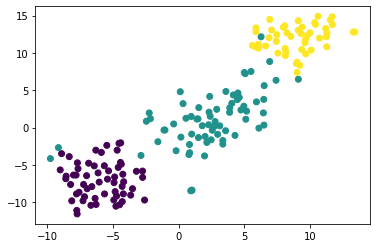

In [5]:
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)

tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=wine.target)
plt.show()